##Problem 1

In [ ]:
install.packages(c("TTR", "zoo", "ggplot2"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘xts’




In [ ]:
install.packages("quantmod")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages(c("plyr", "vars"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘strucchange’, ‘urca’, ‘lmtest’, ‘sandwich’




In [ ]:
library(TTR)       # For EMA
library(zoo)       # For rolling averages
library(ggplot2)   # For visualization
library(quantmod)
library(plyr)
library(vars)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: xts

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: MASS

Loading required package: strucchange

Loading required package: sandwich

Loading required package: urca

Loading required package: lmtest



In [ ]:
data.env <- readRDS("WorldMarkts99_20.RDS")

# Extract all market names (tickers)
markets <- ls(data.env)

# Compute weekly returns (log)
returns <- xts()
for (sym in markets) {
  ret <- periodReturn(Ad(get(sym, data.env)), period = "weekly", type = "log")
  returns <- merge(returns, ret)
}
returns[is.na(returns)] <- 0
colnames(returns) <- paste(markets, ".ret", sep = "")

# Filter your assigned analysis period (2017–2020)
ret.wk <- returns["2017-01-01/2020-04-30"]

Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values

In [ ]:
# Extract GSPC returns from ret.wk and drop any missing values
rets <- na.omit(ret.wk[,"GSPC.ret"])

# Compute EWMA variance and volatility
lambda <- 0.94
ewma_var <- EMA(rets^2, ratio = 1 - lambda)
ewma_vol <- sqrt(ewma_var)

# Compute 10-week rolling variance and volatility
rolling_var <- rollapply(rets^2, width = 10, FUN = mean, align = "right", fill = NA)
rolling_vol <- sqrt(rolling_var)

# Create combined data frame (use the same column names as in the plot)
vol_df <- na.omit(data.frame(
  date = index(rets),
  EWMA = as.numeric(ewma_vol),
  Rolling = as.numeric(rolling_vol)
))

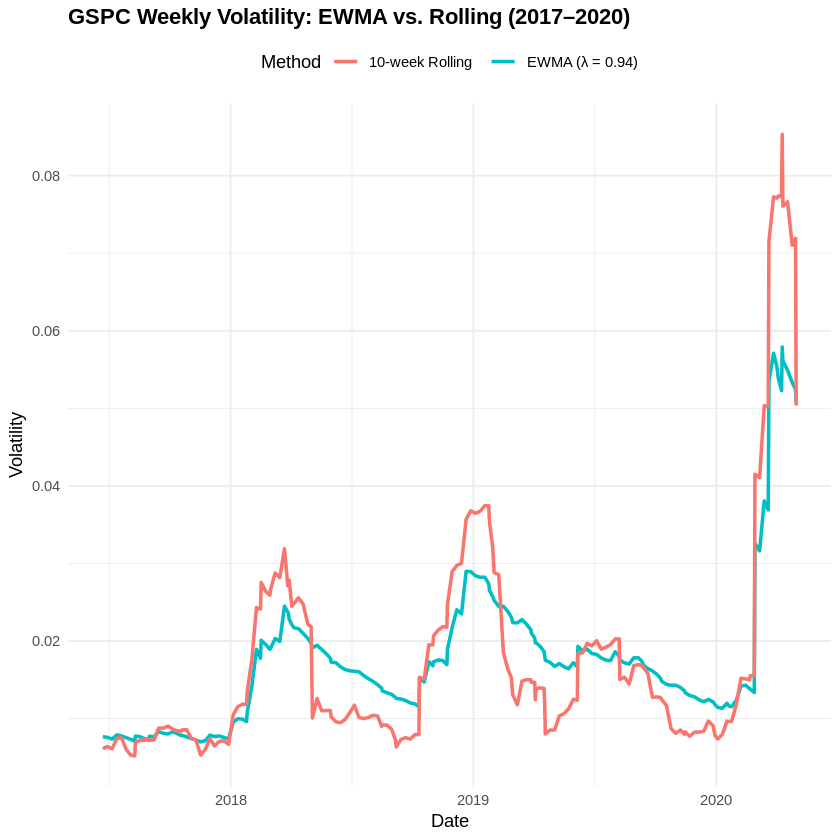

In [ ]:
ggplot(vol_df, aes(x = date)) +
  geom_line(aes(y = EWMA, color = "EWMA (λ = 0.94)"), linewidth = 1) +
  geom_line(aes(y = Rolling, color = "10-week Rolling"), linewidth = 1) +
  labs(
    title = "GSPC Weekly Volatility: EWMA vs. Rolling (2017–2020)",
    y = "Volatility",
    x = "Date",
    color = "Method"
  ) +
  theme_minimal() +
  theme(
    legend.position = "top",
    plot.title = element_text(face = "bold")
  )


The plot compares the estimated volatility of GSPC weekly returns from 2017 to 2020 using two methods: EWMA with λ = 0.94 and a 10-week rolling window. Both methods generally follow similar trends, but the EWMA-based estimate reacts more smoothly and promptly to sudden changes in market conditions. For example, during the sharp market decline in early 2020, EWMA volatility rises rapidly, while the rolling estimate lags and exhibits more jagged fluctuations. This demonstrates the EWMA method’s advantage in capturing recent volatility shocks with greater sensitivity, making it more suitable for real-time risk management.

##Question 2.

In [ ]:
install.packages(c(
  "xts", "quantmod", "plyr", "vars"
))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages(c(
  "TTR", "lmtest"
))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("bruceR", dependencies = c("Depends", "Imports"))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘listenv’, ‘parallelly’, ‘Rdpack’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘SparseM’, ‘MatrixModels’, ‘checkmate’, ‘future’, ‘globals’, ‘R.oo’, ‘R.methodsS3’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘doBy’, ‘carData’, ‘abind’, ‘Formula’, ‘quantreg’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘colorspace’, ‘coda’, ‘furrr’, ‘writexl’, ‘R.utils’, ‘mnormt’, ‘GPArotation’, ‘lme4’, ‘pbkrtest’, ‘car’, ‘reshape2’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘bayestestR’, ‘insight’, ‘parameters’, ‘datawizard’, ‘lpSolve’, ‘Hmisc’, ‘pbivnorm’, ‘quadprog’, ‘broom.mixed’, ‘pander’, ‘rio’, ‘psych’, ‘afex’, ‘emmeans’, ‘effectsize’, ‘performance’, ‘mediation’, ‘interactions’, ‘lavaan’, ‘jtools’, ‘texreg’, ‘lmerTest’


Warning message in install.packages("bruceR", dependencies = c("Depends", "Imports")):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.package

In [ ]:
library(xts)
library(quantmod)
library(plyr)
library(vars)
library(bruceR)
library(TTR)
library(lmtest)

ERROR: Error in library(bruceR): there is no package called ‘bruceR’


In [ ]:
# Load weekly log returns for all markets, 2017–2020
data.env <- readRDS("WorldMarkts99_20.RDS")
markets <- ls(data.env)

returns <- xts()
for (i in seq_along(markets)) {
  sym <- markets[i]
  adjClose <- Ad(get(sym, envir = data.env))
  logRet <- periodReturn(adjClose, period = "weekly", type = "log")
  returns <- merge(returns, logRet)
}
colnames(returns) <- paste(markets, ".ret", sep = "")
returns[is.na(returns)] <- 0
returns <- returns["2017-01/2020-04"]



Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values

In [ ]:
# Calculate EMA volatility from squared weekly returns
volatility <- xts()
ema_window <- 5

for (col in colnames(returns)) {
  squared_ret <- returns[, col]^2
  vol <- EMA(squared_ret, n = ema_window)
  volatility <- merge(volatility, vol)
}
colnames(volatility) <- gsub(".ret", ".vol", colnames(returns))
volatility[is.na(volatility)] <- 0
volatility <- volatility["2017-01/2020-04"]


In [ ]:
# Load monthly log returns for all markets, 2017–2020
monthly_returns <- xts()
for (i in seq_along(markets)) {
  sym <- markets[i]
  adjClose <- Ad(get(sym, envir = data.env))
  logRet <- periodReturn(adjClose, period = "monthly", type = "log")
  monthly_returns <- merge(monthly_returns, logRet)
}
colnames(monthly_returns) <- paste(markets, ".ret", sep = "")
monthly_returns[is.na(monthly_returns)] <- 0
monthly_returns <- monthly_returns["2017-01/2020-04"]



In [ ]:
# Calculate EMA volatility from squared monthly returns
monthly_volatility <- xts()
ema_window <- 3

for (col in colnames(monthly_returns)) {
  squared_ret <- monthly_returns[, col]^2
  vol <- EMA(squared_ret, n = ema_window)
  monthly_volatility <- merge(monthly_volatility, vol)
}
colnames(monthly_volatility) <- gsub(".ret", ".vol", colnames(monthly_returns))
monthly_volatility[is.na(monthly_volatility)] <- 0
monthly_volatility <- monthly_volatility["2017-01/2020-04"]


In [ ]:
# Granger causality (3-lag) for weekly returns
n <- ncol(returns)
weekly_ret_3lag <- matrix(list(), n, n)
rownames(weekly_ret_3lag) <- colnames(returns)
colnames(weekly_ret_3lag) <- colnames(returns)

for (i in 1:n) {
  for (j in 1:n) {
    if (i != j) {
      vec <- c()
      for (lag in 1:3) {
        try({
          pair_data <- na.omit(cbind(returns[, j], returns[, i]))
          colnames(pair_data) <- c("y", "x")
          gt <- grangertest(y ~ x, order = lag, data = pair_data)
          vec <- c(vec, ifelse(gt$`Pr(>F)`[2] < 0.05, 1, 0))
        }, silent = TRUE)
      }
      weekly_ret_3lag[i, j] <- list(vec)
    }
  }
}


In [ ]:
# Granger causality (3-lag) for weekly volatility
n <- ncol(volatility)
weekly_vol_3lag <- matrix(list(), n, n)
rownames(weekly_vol_3lag) <- colnames(volatility)
colnames(weekly_vol_3lag) <- colnames(volatility)

for (i in 1:n) {
  for (j in 1:n) {
    if (i != j) {
      vec <- c()
      for (lag in 1:3) {
        try({
          pair_data <- na.omit(cbind(volatility[, j], volatility[, i]))
          colnames(pair_data) <- c("y", "x")
          gt <- grangertest(y ~ x, order = lag, data = pair_data)
          vec <- c(vec, ifelse(gt$`Pr(>F)`[2] < 0.05, 1, 0))
        }, silent = TRUE)
      }
      weekly_vol_3lag[i, j] <- list(vec)
    }
  }
}


In [ ]:
# Granger causality (3-lag) for monthly returns
n <- ncol(monthly_returns)
monthly_ret_3lag <- matrix(list(), n, n)
rownames(monthly_ret_3lag) <- colnames(monthly_returns)
colnames(monthly_ret_3lag) <- colnames(monthly_returns)

for (i in 1:n) {
  for (j in 1:n) {
    if (i != j) {
      vec <- c()
      for (lag in 1:3) {
        try({
          pair_data <- na.omit(cbind(monthly_returns[, j], monthly_returns[, i]))
          colnames(pair_data) <- c("y", "x")
          gt <- grangertest(y ~ x, order = lag, data = pair_data)
          vec <- c(vec, ifelse(gt$`Pr(>F)`[2] < 0.05, 1, 0))
        }, silent = TRUE)
      }
      monthly_ret_3lag[i, j] <- list(vec)
    }
  }
}


In [ ]:
# Granger causality (3-lag) for monthly volatility
n <- ncol(monthly_volatility)
monthly_vol_3lag <- matrix(list(), n, n)
rownames(monthly_vol_3lag) <- colnames(monthly_volatility)
colnames(monthly_vol_3lag) <- colnames(monthly_volatility)

for (i in 1:n) {
  for (j in 1:n) {
    if (i != j) {
      vec <- c()
      for (lag in 1:3) {
        try({
          pair_data <- na.omit(cbind(monthly_volatility[, j], monthly_volatility[, i]))
          colnames(pair_data) <- c("y", "x")
          gt <- grangertest(y ~ x, order = lag, data = pair_data)
          vec <- c(vec, ifelse(gt$`Pr(>F)`[2] < 0.05, 1, 0))
        }, silent = TRUE)
      }
      monthly_vol_3lag[i, j] <- list(vec)
    }
  }
}


In [ ]:
# Function to convert 3-lag matrix to a readable (1,0,1) string format
format_lag_matrix <- function(lag_mat) {
  formatted <- matrix("", nrow = nrow(lag_mat), ncol = ncol(lag_mat))
  rownames(formatted) <- rownames(lag_mat)
  colnames(formatted) <- colnames(lag_mat)

  for (i in 1:nrow(lag_mat)) {
    for (j in 1:ncol(lag_mat)) {
      if (i == j || is.null(lag_mat[[i, j]])) {
        formatted[i, j] <- "-"
      } else {
        formatted[i, j] <- paste0("(", paste(lag_mat[[i, j]], collapse = ","), ")")
      }
    }
  }

  return(as.data.frame(formatted))
}

# Format all four 3-lag causality matrices
weekly_ret_table <- format_lag_matrix(weekly_ret_3lag)
weekly_vol_table <- format_lag_matrix(weekly_vol_3lag)
monthly_ret_table <- format_lag_matrix(monthly_ret_3lag)
monthly_vol_table <- format_lag_matrix(monthly_vol_3lag)

# Display each table
View(weekly_ret_table)
View(weekly_vol_table)
View(monthly_ret_table)
View(monthly_vol_table)



In [ ]:
install.packages("igraph")
library(igraph)


In [ ]:
# Convert causality matrix to edge list for plotting
make_edge_list <- function(lag_matrix) {
  edges <- data.frame(from = character(), to = character(), stringsAsFactors = FALSE)
  for (i in 1:nrow(lag_matrix)) {
    for (j in 1:ncol(lag_matrix)) {
      if (i != j && !is.null(lag_matrix[[i, j]])) {
        if (sum(lag_matrix[[i, j]]) > 0) {
          edges <- rbind(edges, data.frame(
            from = colnames(lag_matrix)[j],  # Cause
            to = rownames(lag_matrix)[i]     # Effect
          ))
        }
      }
    }
  }
  return(edges)
}

edges_weekly_ret <- make_edge_list(weekly_ret_3lag)


In [ ]:
# Create igraph object
g_ret <- graph_from_data_frame(edges_weekly_ret, directed = TRUE)

# Plot the network
plot(
  g_ret,
  vertex.size = 25,
  vertex.label.cex = 0.8,
  vertex.color = "skyblue",
  edge.arrow.size = 0.4,
  main = "Weekly Return Causality Network"
)
edges_weekly_vol <- make_edge_list(weekly_vol_3lag)
plot(graph_from_data_frame(edges_weekly_vol, directed = TRUE), main = "Weekly Volatility Network")

edges_monthly_ret <- make_edge_list(monthly_ret_3lag)
plot(graph_from_data_frame(edges_monthly_ret, directed = TRUE), main = "Monthly Return Network")

edges_monthly_vol <- make_edge_list(monthly_vol_3lag)
plot(graph_from_data_frame(edges_monthly_vol, directed = TRUE), main = "Monthly Volatility Network")


Granger causality analysis at the 5% significance level reveals substantial interdependence between global equity markets, especially in weekly data. Weekly return networks indicate that developed markets like the United States (GSPC), United Kingdom (FTSE), Germany (GDAXI), and Japan (N225) frequently cause movements in emerging markets such as India (BSESN), Mexico (MXX), and Indonesia (JKSE). Volatility causality is even more pervasive than return causality, with the United States Volatility Index (VIX) acting as a global driver of volatility across nearly all markets — consistent with its role as a proxy for global risk aversion.

The monthly return network shows far sparser causality, suggesting that return predictability weakens at lower frequencies, though volatility spillovers persist strongly. Notably, contemporaneous correlation appears in many bidirectional relationships (e.g., United Kingdom ↔ Germany, United States ↔ VLIC), reflecting high levels of financial integration across developed markets.

These causalities align closely with major economic events during 2017–2020, such as the COVID-19 pandemic, which triggered synchronized spikes in global volatility, as well as US-China trade tensions and Brexit uncertainty, which heightened interconnectedness between major markets. The four directed network graphs clearly illustrate these findings, with central nodes (United States, VIX) exerting widespread influence in both return and volatility networks.